### **Linear Regression**

- Fit a line to a data set of observations;
- Use this line to predict unobserved values;
- It's possible to use to predict points (it can be in the future or in the past).

How it works?
- Usually using "least squares";
- Minimizes the squared-error between each point and the line;
- Slope-intercept equation of line: **y = mx + b**
- The slope is the correlation between the two variables times the standard deviation in Y, all divided by the standard deviation in X;
- The intercept is the mean of Y minus the slope times the mean of X;
- Least squares minimizes the sum of squared errors;
- This is the same as maximizing the likelihood of the observed data if you start thinking of the problem in terms of probabilities and probability distribution functions;
- This is sometimes called "maximum likelihood estimation".

More than one way to do it
- Gradient Descent is an alternate method to least squares;
- Basicaly iterates to find the line that best follows the contours defined by the data;
- Can make sense when dealing with 3D data;

Measuring error with r-squared
- How do we measure how well our line fits our data?
- R-squared (aka coefficient of determination) measures: **The fraction of the total variation in Y that is captured by the model.**

Interpreting r-squared
- Ranges from 0 t o1
- 0 is bad (none of the variance is captured), 1 is good (all of the variance is captured)

Creating some fake data that shows a roughly linear relationship between page speed and amount purchased:

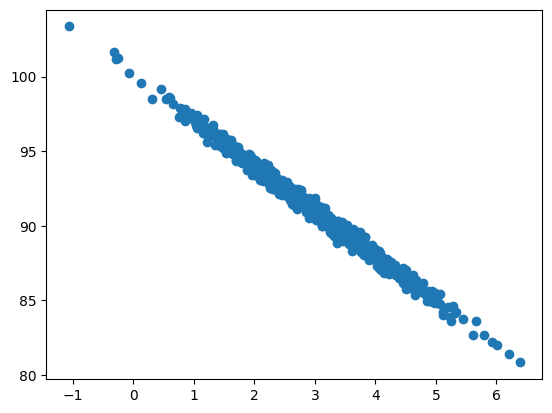

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

scatter(pageSpeeds, purchaseAmount)

As here are only have two features, it possible to keep it simple and just use **scipy.state.linregress**:

In [2]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


In [3]:
r_value ** 2

0.990506051660036

> Not surprisngly, the R-squared value shows a really good fit.

Using the slope and intercept to get the regression to plot predicted values vs. observed:

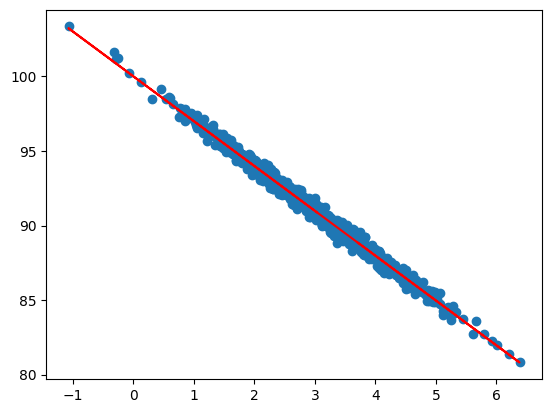

In [4]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

### **Polynomial Regression**

- Not all relationships are linear.


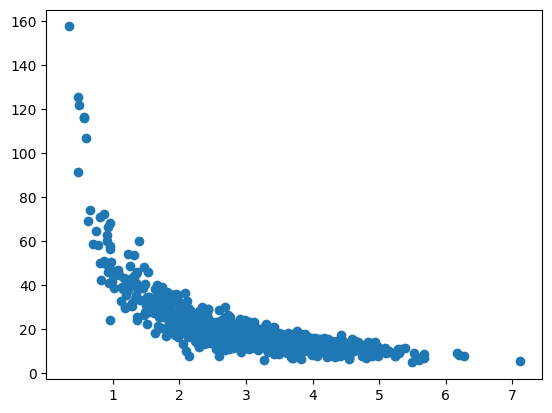

In [5]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

Numpy has a handy polyfit function that can be used to construct an nth-degree polynomial model for the data that minimizes squared error. 

Trying it with a 4th degree polynomial:

In [6]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

Original scatter plot, together with a plot of the predicted values using the polynomial for page speed times ranging from 0-7 seconds:

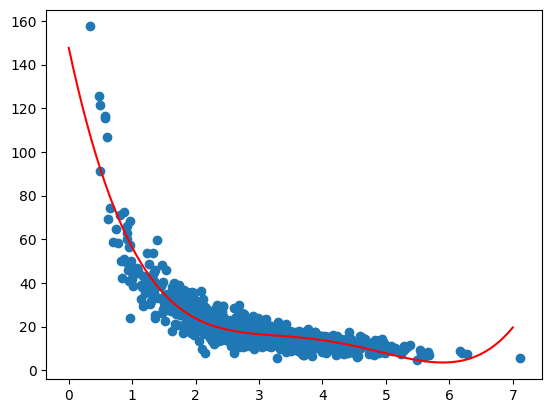

In [7]:
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

> Looks pretty good! 

Checking the r-squared error:

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.8293766396303073


### **Multiple Regression**

In [12]:
import pandas as pd

df = pd.read_excel('Data/cars.xls')

In [13]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


<Axes: xlabel='Mileage'>

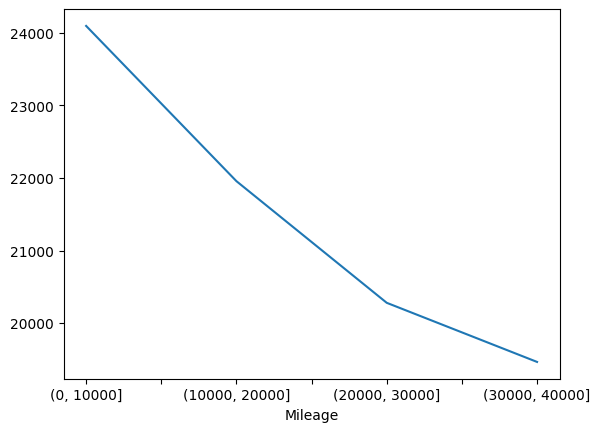

In [15]:
df1=df[['Mileage','Price']]

bins =  np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'], bins), observed=False).mean()
print(groups.head())
groups['Price'].plot.line()

In [18]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X.loc[:, ['Mileage', 'Cylinder', 'Doors']] = StandardScaler().fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

# Add a constant column to the model to have a Y-intercept
X = sm.add_constant(X)

print (X)

est = sm.OLS(y, X).fit()

print(est.summary())

     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           3.95e-77
Time:                        23:24:02   Log-Likelihood:                -8356.7
No. Observ

In [19]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

> More doors does not mean a higher price!

So it's not a goodpredictor here. This is a very small data set however, so it can't really read much meaning into it.


How to use this to make an actual prediction? 

Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [22]:
scaled = scale.transform([[45000, 8, 4]])
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
print(scaled)
predicted = est.predict(scaled)
print(predicted)

[1.         3.07256589 1.96971667 0.55627894]
[27658.15707316]
